<a href="https://colab.research.google.com/github/nirkor123/AI_course/blob/main/H_W_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a code that creates a matrix of 255 by 255 that represents an image in a grey level image,  the whole picture is black(0), and in the middle there is a square of 50 by 50 pixels with the value 100.


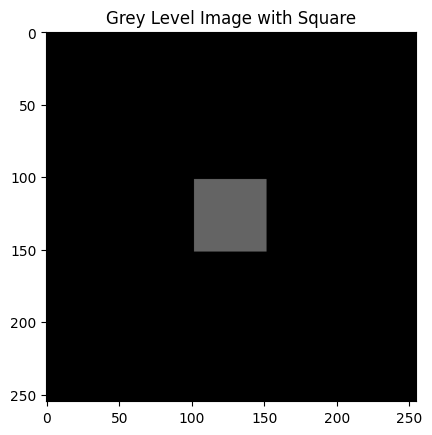

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a black (0) matrix of size 255x255
image_matrix = np.zeros((255, 255), dtype=np.uint8)

# Define the coordinates for the square in the middle
square_size = 50
start_x = (255 - square_size) // 2
start_y = (255 - square_size) // 2
end_x = start_x + square_size
end_y = start_y + square_size

# Set the values inside the square to 100
image_matrix[start_y:end_y, start_x:end_x] = 100

# Display the image
plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=255)
plt.title('Grey Level Image with Square')
plt.show()


can you write a code that will print the values of the middle row? and print it as a graph


Middle Row Values: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0

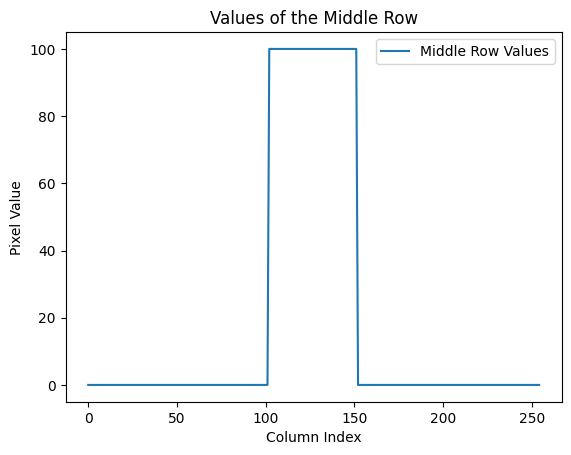

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a black (0) matrix of size 255x255
image_matrix = np.zeros((255, 255), dtype=np.uint8)

# Define the coordinates for the square in the middle
square_size = 50
start_x = (255 - square_size) // 2
start_y = (255 - square_size) // 2
end_x = start_x + square_size
end_y = start_y + square_size

# Set the values inside the square to 100
image_matrix[start_y:end_y, start_x:end_x] = 100

# Get the values of the middle row
middle_row_values = image_matrix[127, :]

# Print the values
print("Middle Row Values:", middle_row_values)

# Plot the values as a graph
plt.plot(middle_row_values, label='Middle Row Values')
plt.xlabel('Column Index')
plt.ylabel('Pixel Value')
plt.title('Values of the Middle Row')
plt.legend()
plt.show()


thank you, can you now write a code that the square will move from the upper left corner to the bottom right corner and make it as a viewable gif in Google Colab

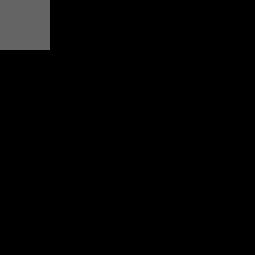

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Function to create a frame with a moving square
def create_frame(size, position, value):
    # Create a blank frame
    frame = np.zeros((size, size), dtype=np.uint8)

    # Calculate the starting and ending indices for the square in both dimensions
    start_row, start_col = position
    end_row = start_row + square_size
    end_col = start_col + square_size

    # Set the values for the square in the frame
    frame[start_row:end_row, start_col:end_col] = value

    return frame

# Parameters
size = 255
square_size = 50
square_value = 100

# Generate frames for the gif
frames = []
for i in range(size - square_size + 1):
    position = (i, i)
    frame = create_frame(size, position, square_value)
    frames.append(frame)

# Save frames as a gif
imageio.mimsave('moving_square.gif', frames, duration=0.1)

# Display the gif in Google Colab
from IPython.display import display, Image

with open('moving_square.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))


thank you, can you now write a code that will track the grey area and will bound the grey area by a blue square with a width of 5. the outcome should be printed as a gif and as a normal printing

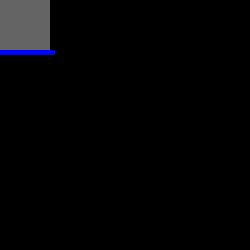

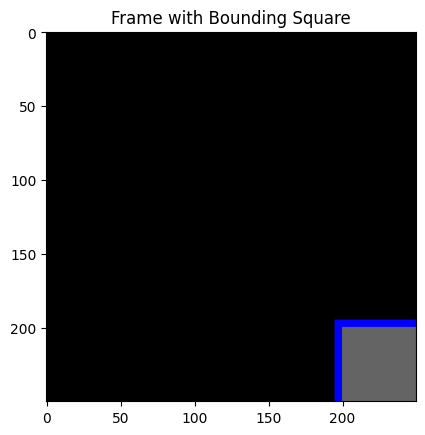

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Function to create a frame with a moving grey square and blue bounding square
def create_frame(size, position, square_size, square_value, bounding_width):
    # Create a blank frame
    frame = np.zeros((size, size, 3), dtype=np.uint8)  # 3 channels for RGB

    # Calculate the starting and ending indices for the grey square in both dimensions
    start_row, start_col = position
    end_row = start_row + square_size
    end_col = start_col + square_size

    # Set the values for the grey square in the frame
    frame[start_row:end_row, start_col:end_col, :] = [square_value, square_value, square_value]

    # Draw the blue bounding square
    frame[start_row - bounding_width:end_row + bounding_width,
          start_col - bounding_width:start_col, :] = [0, 0, 255]  # Left side
    frame[start_row - bounding_width:end_row + bounding_width,
          end_col:end_col + bounding_width, :] = [0, 0, 255]  # Right side
    frame[start_row - bounding_width:start_row,
          start_col:start_col + square_size + 1 * bounding_width, :] = [0, 0, 255]  # Top side
    frame[end_row:end_row + bounding_width,
          start_col:start_col + square_size + 1 * bounding_width, :] = [0, 0, 255]  # Bottom side

    return frame

# Parameters
size = 250
square_size = 50
square_value = 100
bounding_width = 5

# Generate frames for the gif
frames = []
for i in range(size - square_size + 1):
    position = (i, i)
    frame = create_frame(size, position, square_size, square_value, bounding_width)
    frames.append(frame)

# Save frames as a gif
imageio.mimsave('tracking_square.gif', frames, duration=0.1)

# Display the gif in Google Colab
from IPython.display import display, Image

with open('tracking_square.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))

# Display a single frame with the bounding square
plt.imshow(frames[-1])
plt.title('Frame with Bounding Square')
plt.show()


can you please rewrite it so instead of printing the last frame it will print the location of the center of the grey area

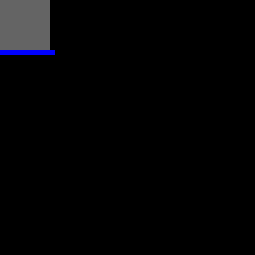

Frame 1: Center at (25, 25)
Frame 2: Center at (26, 26)
Frame 3: Center at (27, 27)
Frame 4: Center at (28, 28)
Frame 5: Center at (29, 29)
Frame 6: Center at (30, 30)
Frame 7: Center at (31, 31)
Frame 8: Center at (32, 32)
Frame 9: Center at (33, 33)
Frame 10: Center at (34, 34)
Frame 11: Center at (35, 35)
Frame 12: Center at (36, 36)
Frame 13: Center at (37, 37)
Frame 14: Center at (38, 38)
Frame 15: Center at (39, 39)
Frame 16: Center at (40, 40)
Frame 17: Center at (41, 41)
Frame 18: Center at (42, 42)
Frame 19: Center at (43, 43)
Frame 20: Center at (44, 44)
Frame 21: Center at (45, 45)
Frame 22: Center at (46, 46)
Frame 23: Center at (47, 47)
Frame 24: Center at (48, 48)
Frame 25: Center at (49, 49)
Frame 26: Center at (50, 50)
Frame 27: Center at (51, 51)
Frame 28: Center at (52, 52)
Frame 29: Center at (53, 53)
Frame 30: Center at (54, 54)
Frame 31: Center at (55, 55)
Frame 32: Center at (56, 56)
Frame 33: Center at (57, 57)
Frame 34: Center at (58, 58)
Frame 35: Center at (59

In [6]:
import numpy as np
import imageio

# Function to create a frame with a moving grey square and blue bounding square
def create_frame(size, position, square_size, square_value, bounding_width):
    # Create a blank frame
    frame = np.zeros((size, size, 3), dtype=np.uint8)  # 3 channels for RGB

    # Calculate the starting and ending indices for the grey square in both dimensions
    start_row, start_col = position
    end_row = start_row + square_size
    end_col = start_col + square_size

    # Set the values for the grey square in the frame
    frame[start_row:end_row, start_col:end_col, :] = [square_value, square_value, square_value]

    # Draw the blue bounding square
    frame[start_row - bounding_width:end_row + bounding_width,
          start_col - bounding_width:start_col, :] = [0, 0, 255]  # Left side
    frame[start_row - bounding_width:end_row + bounding_width,
          end_col:end_col + bounding_width, :] = [0, 0, 255]  # Right side
    frame[start_row - bounding_width:start_row,
          start_col:start_col + square_size + 1 * bounding_width, :] = [0, 0, 255]  # Top side
    frame[end_row:end_row + bounding_width,
          start_col:start_col + square_size + 1 * bounding_width, :] = [0, 0, 255]  # Bottom side

    return frame, (start_row + end_row) // 2, (start_col + end_col) // 2  # Return frame and center coordinates

# Parameters
size = 255
square_size = 50
square_value = 100
bounding_width = 5

# Generate frames for the gif
frames = []
center_coordinates = []

for i in range(size - square_size + 1):
    position = (i, i)
    frame, center_row, center_col = create_frame(size, position, square_size, square_value, bounding_width)
    frames.append(frame)
    center_coordinates.append((center_row, center_col))

# Save frames as a gif
imageio.mimsave('tracking_square.gif', frames, duration=0.1)

# Display the gif in Google Colab
from IPython.display import display, Image

with open('tracking_square.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))

# Print the center coordinates for each frame
for i, (row, col) in enumerate(center_coordinates):
    print(f"Frame {i+1}: Center at ({row}, {col})")
